### Getting Started
- Create virtual environment

`python -m venv .venv`

- Activate virtual environment (on Windows)

`.venv\Scripts\activate.bat`

- Install Python libraries

`pip install -r requirements.txt`

- Create .env file with following variables. Use values appropriate to your environment

```
AZURE_OPENAI_ENDPOINT = "https://<REPLACE_ME>.openai.azure.com/"

AZURE_OPENAI_API_KEY = "<REPLACE_ME>"

AZURE_OPENAI_DALL_E_DEPLOYMENT = "<REPLACE_ME>"
```


### Import libraries

In [1]:
from openai import AzureOpenAI
import os
import requests
from PIL import Image
import json
from dotenv import load_dotenv
from IPython.display import display

### Load environment variables from .env file

In [2]:
load_dotenv(".env")

True

### Create Azure OpenAI client

In [3]:
client = AzureOpenAI(
    api_version="2024-02-01",  
    api_key=os.environ["AZURE_OPENAI_API_KEY"],  
    azure_endpoint=os.environ['AZURE_OPENAI_ENDPOINT']
)

### Generate image

In [4]:

def generate_image_from_text(prompt):
    result = client.images.generate(
        model=os.environ["AZURE_OPENAI_DALL_E_DEPLOYMENT"], # the name of your DALL-E 3 deployment
        prompt=prompt,
        n=1
    )
    print(f'Original prompt: {prompt}')
    print(f'Revised prompt: {result.data[0].revised_prompt}')
    return result

### Save image

In [5]:
def save_image(dall_e_result, image_dir="images"):

    json_response = json.loads(dall_e_result.model_dump_json())

    # Set the directory for the stored image
    image_dir = os.path.join(os.curdir, image_dir)

    # If the directory doesn't exist, create it
    if not os.path.isdir(image_dir):
        os.mkdir(image_dir)

    # Initialize the image path (note the filetype should be png)
    image_path = os.path.join(image_dir, 'generated_image.png')

    # Retrieve the generated image
    image_url = json_response["data"][0]["url"]  # extract image URL from response
    generated_image = requests.get(image_url).content  # download the image
    with open(image_path, "wb") as image_file:
        image_file.write(generated_image)
    return image_path


### Prompt 1

Original prompt: a close-up of a black wolf walking throughthe forest
Revised prompt: A meticulous close-up image of a black wolf, its fur dark as the night, striding purposefully through a lush forest. Its vivid yellow eyes piercing through the shadows, alert and on the lookout. Around it, the forest is alive - emerald leaves dance in the breeze, dappling the scene with patches of sunlight. The wolf's powerful, muscular body captures the raw beauty of wilderness, exuding an intimidating but fascinating allure.


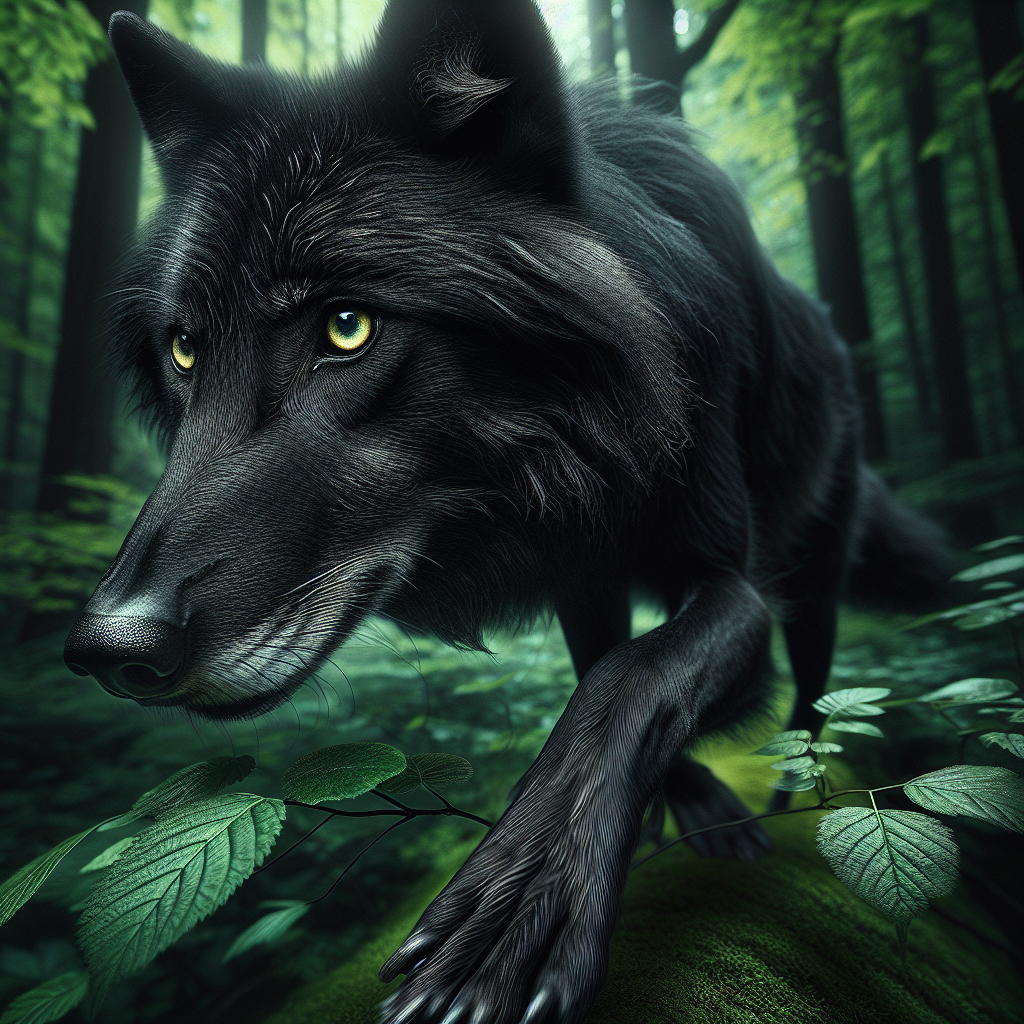

In [6]:
prompt = "a close-up of a black wolf walking throughthe forest"
result = generate_image_from_text(prompt)

image_path = save_image(result)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)

### Prompt 2

Original prompt: Nestle Nespresso coffee machine, pink, with a cup of coffee on the side
Revised prompt: A Nestle Nespresso coffee machine in a vibrant shade of pink positioned on a smooth counter. A porcelain cup filled with fresh, steaming coffee is placed right next to the machine exuding a soothing aroma.


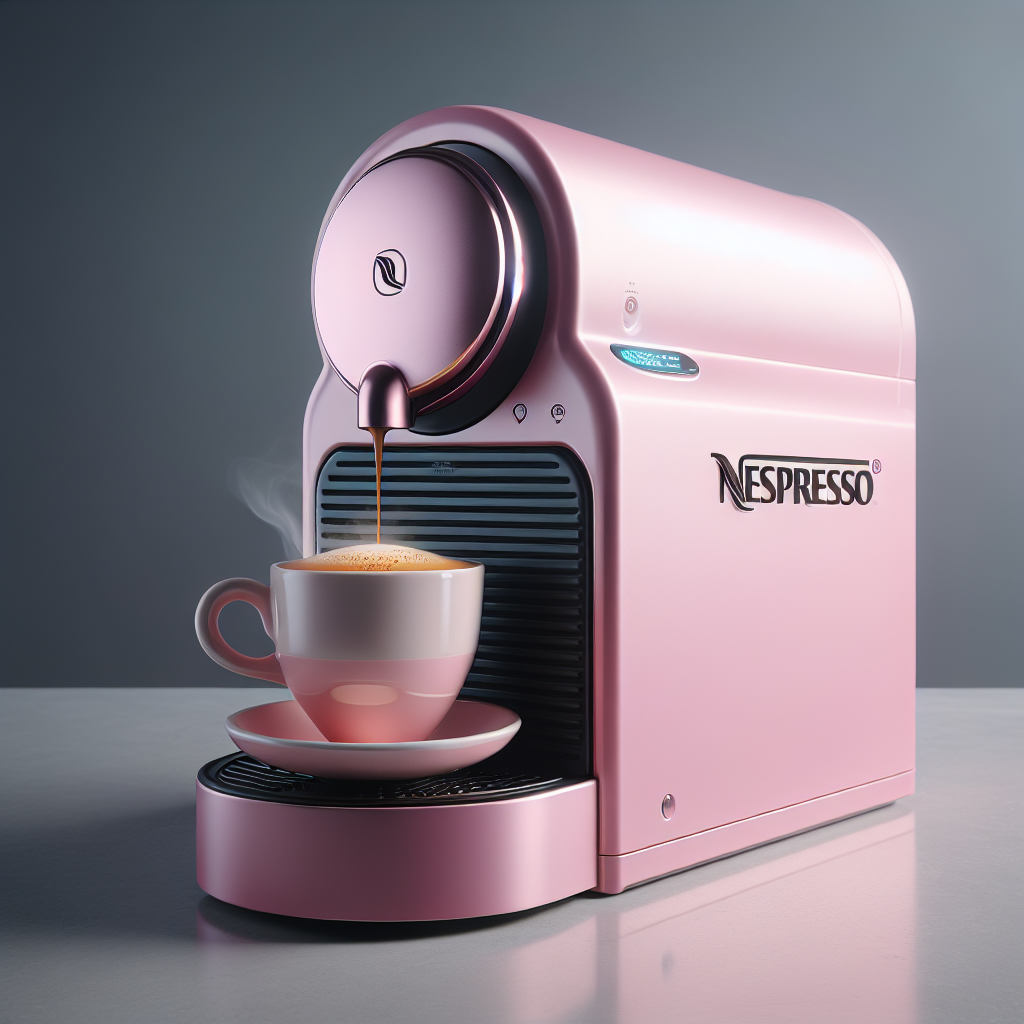

In [7]:
prompt = "Nestle Nespresso coffee machine, pink, with a cup of coffee on the side"
result = generate_image_from_text(prompt)

image_path = save_image(result)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)

### Prompt 3 (use short prompt, the way it is)

Original prompt: 
I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS:
Nestle Nespresso coffee machine, pink, with a cup of coffee on the side

Revised prompt: Nestle Nespresso coffee machine, pink, with a cup of coffee on the side


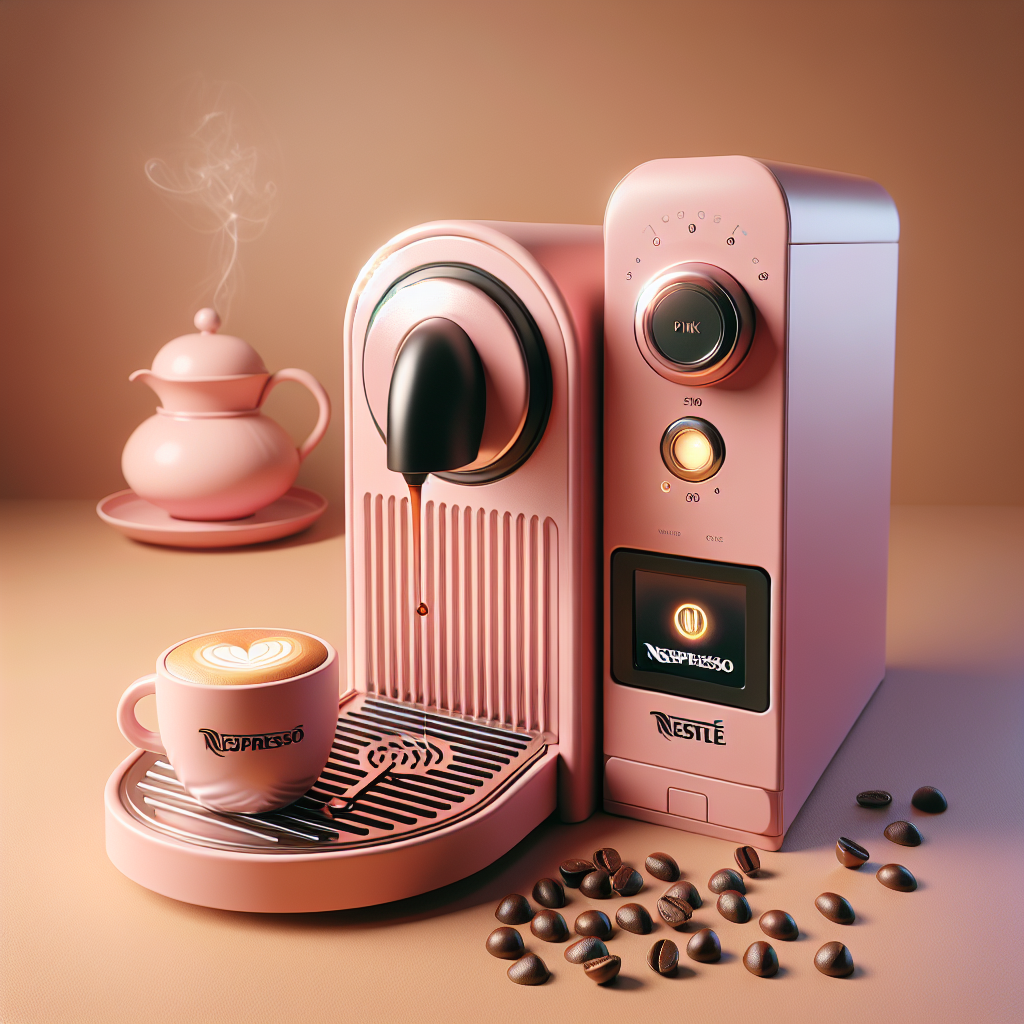

In [8]:
prompt = """
I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS:
Nestle Nespresso coffee machine, pink, with a cup of coffee on the side
"""
result = generate_image_from_text(prompt)

image_path = save_image(result)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)

### Prompt 4 (use long prompt, the way it is)

Original prompt: 
My prompt has full detail so no need to add more:
A sleek and modern Nestle Nespresso coffee machine in a vibrant pink color, placed on a stylish kitchen countertop.
Next to the machine, there's a beautifully crafted cup of steaming hot coffee, with a delicate swirl of crema on top.
The setting is bright and inviting, with soft natural light filtering through a nearby window, highlighting the elegant design of the coffee machine and the rich texture of the coffee.

Revised prompt: A sleek and modern Nestle Nespresso coffee machine in a vibrant pink color, placed on a stylish kitchen countertop. Next to the machine, there's a beautifully crafted cup of steaming hot coffee, with a delicate swirl of crema on top. The setting is bright and inviting, with soft natural light filtering through a nearby window, highlighting the elegant design of the coffee machine and the rich texture of the coffee.


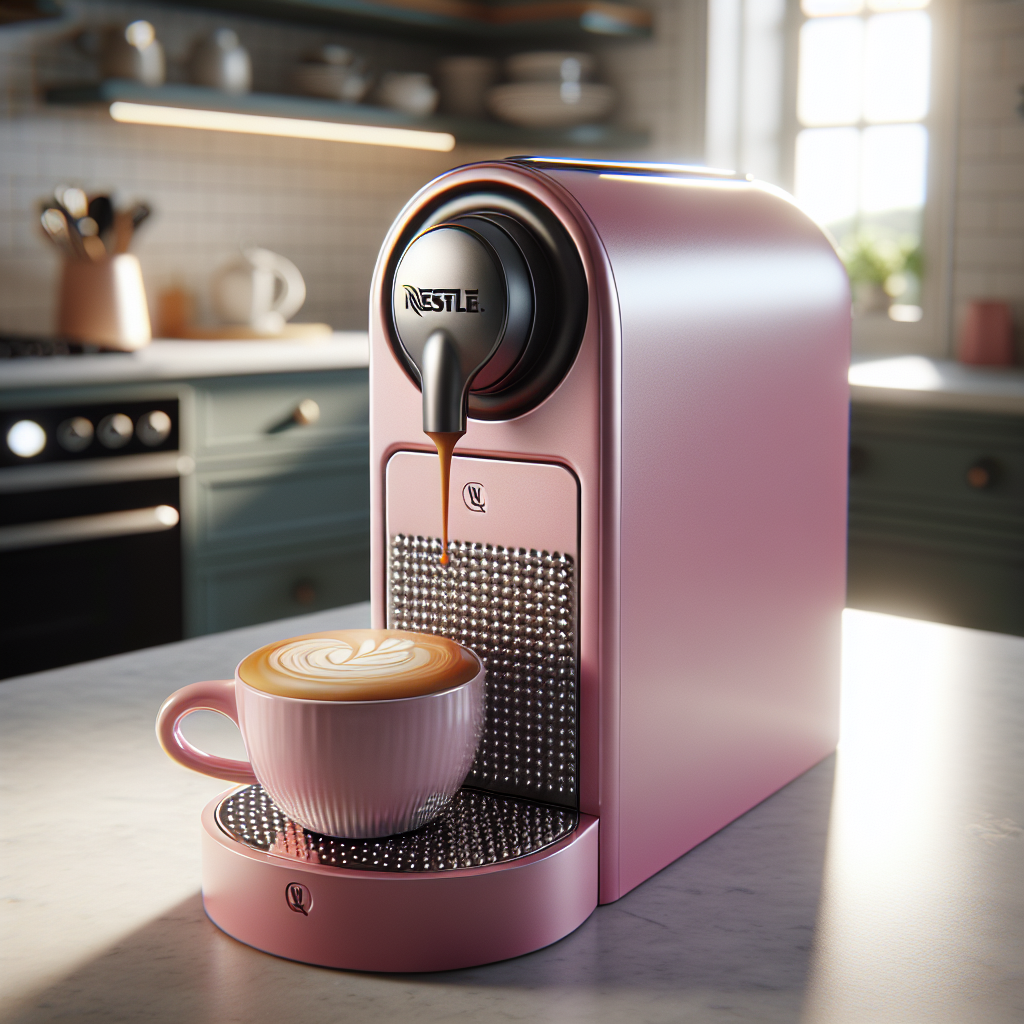

In [9]:
prompt = """
My prompt has full detail so no need to add more:
A sleek and modern Nestle Nespresso coffee machine in a vibrant pink color, placed on a stylish kitchen countertop.
Next to the machine, there's a beautifully crafted cup of steaming hot coffee, with a delicate swirl of crema on top.
The setting is bright and inviting, with soft natural light filtering through a nearby window, highlighting the elegant design of the coffee machine and the rich texture of the coffee.
"""
result = generate_image_from_text(prompt)

image_path = save_image(result)

# Display the image in the default image viewer
image = Image.open(image_path)
display(image)